# Instructor Do: Speeding up ML algorithms with PCA

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Loading the preprocessed iris dataset
file_path = Path("../Resources/new_iris_data.csv")
df_iris = pd.read_csv(file_path)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using PCA

In [3]:
# Standarize data with StandarScaler
iris_scaled = StandardScaler().fit_transform(df_iris)
print(iris_scaled[0:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [4]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the iris data.
iris_pca = pca.fit_transform(iris_scaled)

In [5]:
# Transform PCA data to a DataFrame
df_iris_pca = pd.DataFrame(
    data=iris_pca, columns=["principal component 1", "principal component 2"]
)
df_iris_pca.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## Running KMeans with PCA Data

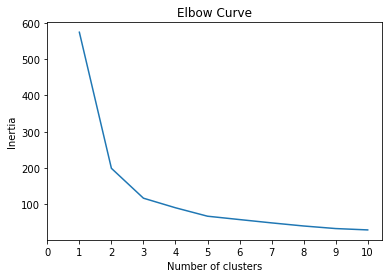

In [7]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_iris_pca)

# Predict clusters
predictions = model.predict(df_iris_pca)

# Add the predicted class column to the dataframe
df_iris_pca["class"] = model.labels_
df_iris_pca.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


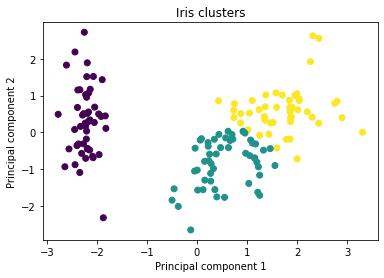

In [9]:
# Visualize the clusters
plt.scatter(x=df_iris_pca['principal component 1'], y=df_iris_pca['principal component 2'], c=df_iris_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Iris clusters')
plt.show()